# KNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from pynndescent import NNDescent

In [2]:
data1 = pd.read_csv('ushape.csv')

In [3]:
data1.head()

,X,Y,class
0,0.031595,0.986988,0
1,2.115098,-0.046244,1
2,0.882490,-0.075756,0
3,-0.055144,-0.037332,1
4,0.829545,-0.539321,1


In [4]:
class KNN():
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
    def fit(self, X, Y):
        self.index = NNDescent(X)
        self.Y = Y
    def predict(self, data):
        data_index, _ = self.index.query(data, k = self.n_neighbors)
        results = []
        for indexes in data_index:
            t = self.Y[indexes] 
            counts = np.bincount(t)
            results.append(np.argmax(counts))
        return np.array(results)
    
def knn_comparison(data, k): 
    x = data[['X','Y']].values 
    y = data['class'].astype(int).values
    clf = KNN(n_neighbors=k)
    clf.fit(x, y)
    plt.figure()
    plot_decision_regions(x, y, clf=clf, legend=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    print(k)
    plt.title('Knn with K='+ str(k))
    plt.show()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


1


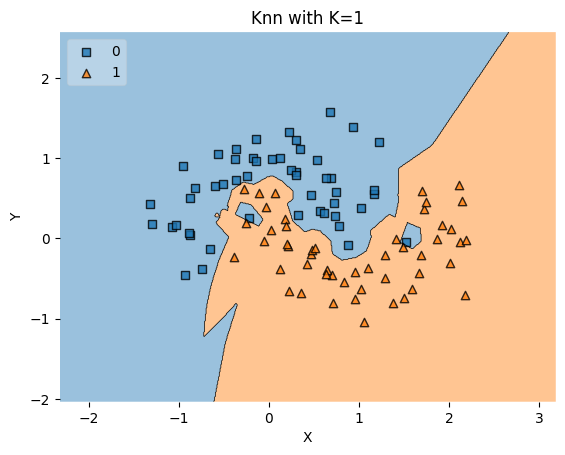

2


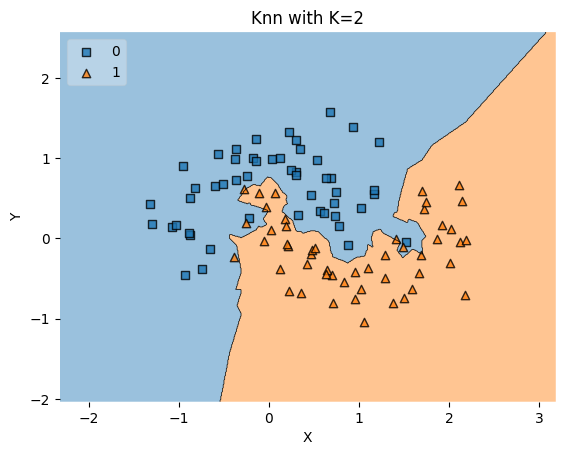

5


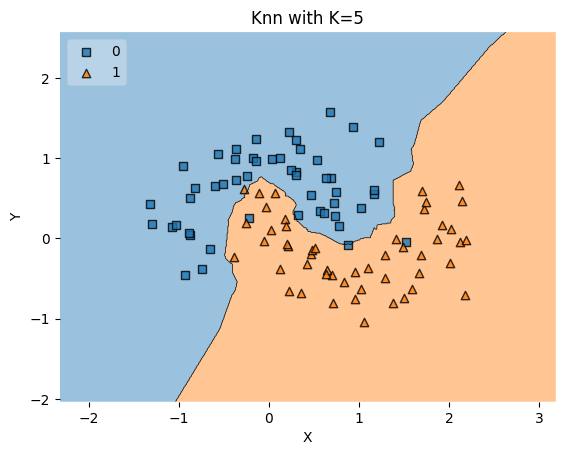

10


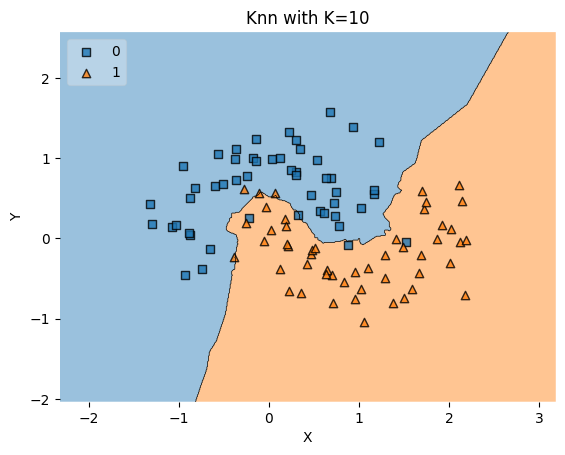

In [5]:
for idx in [1, 2, 5, 10]:
    knn_comparison(data1, idx)

# Jax

In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# JAX Two Functions

In [7]:
def sum_of_squares(x):
    return jnp.sum(x**2)

def sum_squared_error(x, y):
    return jnp.sum((x-y)**2)

In [8]:
# Estimation 

In [9]:
x = jnp.asarray([1.0, 2.0, 3.0, 4.0])
y = jnp.asarray([2.0, 4.0, 3.0, 4.0])
sum_of_squares_dx  = jax.grad(sum_squared_error)

In [10]:
x

Array([1., 2., 3., 4.], dtype=float32)

In [11]:
print(sum_of_squares(x))

30.0


In [12]:
print(sum_of_squares_dx(x, y))

[-2. -4.  0.  0.]


In [13]:
jax.value_and_grad(sum_of_squares)(x)

(Array(30., dtype=float32), Array([2., 4., 6., 8.], dtype=float32))

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

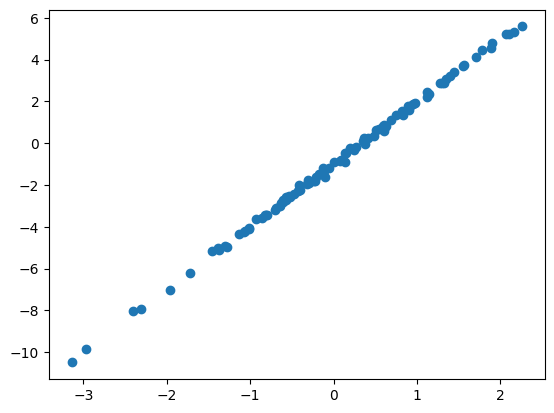

In [5]:
plt.scatter(xs, ys)

# Linear Model with Gradient Descent


In [3]:
def model(theta, x):
    """Computes wx + b on a batch of input x."""
    w, b = theta
    return w * x + b

def loss_fn(theta, x, y):
    prediction = model(theta, x)
    return jnp.mean((prediction-y)**2)

def update(theta, x, y, lr=0.05):
    return theta - lr * jax.grad(loss_fn)(theta, x, y)

# Select a Point and Use Gradient Descent

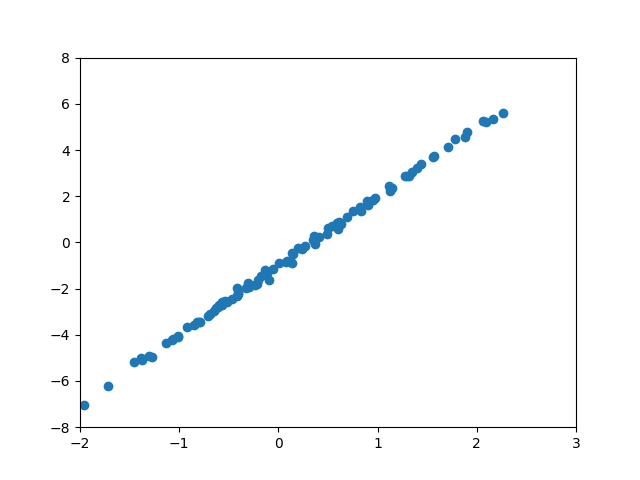

In [9]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(xlim=(-2, 3), ylim=(-8, 8))
plt.scatter(xs, ys)
line, = ax.plot([], [], lw=2, color = 'red')

def init():
    line.set_data([], [])
    return line,

theta = jnp.array([1., 1.])

def animate(i):
    global theta
    theta = update(theta, xs, ys)
    line.set_data(xs, model(theta, xs))
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=60, interval=200, repeat=False)


In [23]:
w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")

w: 3.00, b: -0.99


In [19]:
300+50

350